# First Part : Import data

In [2]:
import scipy
import numpy
import sklearn
import pandas as pds
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn import tree
from sklearn import metrics

In [3]:
dt = pds.read_csv('569a01d3-3538-49da-a03a-63d8d3151235_Data.txt', sep="\t") # load a pandas dataframe from csv in current directory
dt = dt[:-5]
dt

,Time,Time Code,Country Name,Country Code,CO2 emissions (kg per 2011 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD],Access to electricity (% of population) [EG.ELC.ACCS.ZS],"Electricity production from oil, gas and coal sources (% of total) [EG.ELC.FOSL.ZS]",GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG],"Industry (including construction), value added per worker (constant 2010 US$) [NV.IND.EMPL.KD]","Agriculture, forestry, and fishing, value added per worker (constant 2010 US$) [NV.AGR.EMPL.KD]","International tourism, receipts (% of total exports) [ST.INT.RCPT.XP.ZS]",Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],Urban population (% of total population) [SP.URB.TOTL.IN.ZS],"Population, total [SP.POP.TOTL]","Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]",Forest area (% of land area) [AG.LND.FRST.ZS]
0,2014,YR2014,Afghanistan,AFG,0.163691,89.500000,NaN,-0.665271,2098.467820,1016.325617,6.091047,15.782377,51.413547,24.587,33370794.0,7.141,2.067825
1,2014,YR2014,Albania,ALB,0.184922,100.000000,0.000000,1.980930,15410.716379,5431.984311,49.514703,28.213001,47.194844,56.423,2889104.0,7.219,28.191972
2,2014,YR2014,Algeria,DZA,0.275704,99.877052,99.604620,1.699790,27123.281149,19022.535897,0.496957,30.219117,31.926659,70.221,38923687.0,4.709,0.818057
3,2014,YR2014,American Samoa,ASM,NaN,NaN,NaN,0.803753,NaN,NaN,NaN,66.251944,105.443235,87.288,55791.0,4.200,87.900000
4,2014,YR2014,Andorra,AND,NaN,100.000000,NaN,4.293204,NaN,NaN,NaN,NaN,NaN,88.441,79213.0,NaN,34.042553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2014,YR2014,Virgin Islands (U.S.),VIR,NaN,100.000000,NaN,-0.719195,NaN,NaN,NaN,77.167311,83.627830,95.213,107884.0,7.100,50.599997
213,2014,YR2014,West Bank and Gaza,PSE,NaN,99.900000,NaN,-2.494494,8568.831554,4986.648601,18.966632,17.083740,56.693353,75.113,4173398.0,3.495,1.523256
214,2014,YR2014,"Yemen, Rep.",YEM,0.229594,66.100000,100.000000,-2.802976,16974.739563,1694.384061,12.714204,NaN,NaN,34.165,25823485.0,5.974,1.039832
215,2014,YR2014,Zambia,ZMB,0.079359,27.900000,2.836978,1.478424,12581.055672,654.185802,5.798925,38.822429,41.241132,41.382,15399753.0,7.565,65.647374


In [4]:
 stamps = ['Time\t', 'Time Code\t', 'Country Name\t', 'Country Code\t', 'CO2 emissions (kg per 2011 PPP $ of GDP)\t', 'Access to electricity (% of population)\t', 'Electricity production from oil, gas and coal sources (% of total)\t', 'GDP per capita growth (annual %)\t', 'Industry (including construction), value added per worker (constant 2010 US$)\t', 'Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)\t', 'International tourism, receipts (% of total exports)\t', 'Exports of goods and services (% of GDP)\t', 'Imports of goods and services (% of GDP)\t', 'Urban population (% of total population)\t', 'Population, total\t', 'Death rate, crude (per 1,000 people)\t', 'Forest area (% of land area)']

In [5]:
dt.columns = stamps
dt

,Time\t,Time Code\t,Country Name\t,Country Code\t,CO2 emissions (kg per 2011 PPP $ of GDP)\t,Access to electricity (% of population)\t,"Electricity production from oil, gas and coal sources (% of total)\t",GDP per capita growth (annual %)\t,"Industry (including construction), value added per worker (constant 2010 US$)\t","Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)\t","International tourism, receipts (% of total exports)\t",Exports of goods and services (% of GDP)\t,Imports of goods and services (% of GDP)\t,Urban population (% of total population)\t,"Population, total\t","Death rate, crude (per 1,000 people)\t",Forest area (% of land area)
0,2014,YR2014,Afghanistan,AFG,0.163691,89.500000,NaN,-0.665271,2098.467820,1016.325617,6.091047,15.782377,51.413547,24.587,33370794.0,7.141,2.067825
1,2014,YR2014,Albania,ALB,0.184922,100.000000,0.000000,1.980930,15410.716379,5431.984311,49.514703,28.213001,47.194844,56.423,2889104.0,7.219,28.191972
2,2014,YR2014,Algeria,DZA,0.275704,99.877052,99.604620,1.699790,27123.281149,19022.535897,0.496957,30.219117,31.926659,70.221,38923687.0,4.709,0.818057
3,2014,YR2014,American Samoa,ASM,NaN,NaN,NaN,0.803753,NaN,NaN,NaN,66.251944,105.443235,87.288,55791.0,4.200,87.900000
4,2014,YR2014,Andorra,AND,NaN,100.000000,NaN,4.293204,NaN,NaN,NaN,NaN,NaN,88.441,79213.0,NaN,34.042553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2014,YR2014,Virgin Islands (U.S.),VIR,NaN,100.000000,NaN,-0.719195,NaN,NaN,NaN,77.167311,83.627830,95.213,107884.0,7.100,50.599997
213,2014,YR2014,West Bank and Gaza,PSE,NaN,99.900000,NaN,-2.494494,8568.831554,4986.648601,18.966632,17.083740,56.693353,75.113,4173398.0,3.495,1.523256
214,2014,YR2014,"Yemen, Rep.",YEM,0.229594,66.100000,100.000000,-2.802976,16974.739563,1694.384061,12.714204,NaN,NaN,34.165,25823485.0,5.974,1.039832
215,2014,YR2014,Zambia,ZMB,0.079359,27.900000,2.836978,1.478424,12581.055672,654.185802,5.798925,38.822429,41.241132,41.382,15399753.0,7.565,65.647374


In [6]:
dt.index = dt['Country Name\t']
dt

,Time\t,Time Code\t,Country Name\t,Country Code\t,CO2 emissions (kg per 2011 PPP $ of GDP)\t,Access to electricity (% of population)\t,"Electricity production from oil, gas and coal sources (% of total)\t",GDP per capita growth (annual %)\t,"Industry (including construction), value added per worker (constant 2010 US$)\t","Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)\t","International tourism, receipts (% of total exports)\t",Exports of goods and services (% of GDP)\t,Imports of goods and services (% of GDP)\t,Urban population (% of total population)\t,"Population, total\t","Death rate, crude (per 1,000 people)\t",Forest area (% of land area)
Country Name,,,,,,,,,,,,,,,,,
Afghanistan,2014,YR2014,Afghanistan,AFG,0.163691,89.500000,NaN,-0.665271,2098.467820,1016.325617,6.091047,15.782377,51.413547,24.587,33370794.0,7.141,2.067825
Albania,2014,YR2014,Albania,ALB,0.184922,100.000000,0.000000,1.980930,15410.716379,5431.984311,49.514703,28.213001,47.194844,56.423,2889104.0,7.219,28.191972
Algeria,2014,YR2014,Algeria,DZA,0.275704,99.877052,99.604620,1.699790,27123.281149,19022.535897,0.496957,30.219117,31.926659,70.221,38923687.0,4.709,0.818057
American Samoa,2014,YR2014,American Samoa,ASM,NaN,NaN,NaN,0.803753,NaN,NaN,NaN,66.251944,105.443235,87.288,55791.0,4.200,87.900000
Andorra,2014,YR2014,Andorra,AND,NaN,100.000000,NaN,4.293204,NaN,NaN,NaN,NaN,NaN,88.441,79213.0,NaN,34.042553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),2014,YR2014,Virgin Islands (U.S.),VIR,NaN,100.000000,NaN,-0.719195,NaN,NaN,NaN,77.167311,83.627830,95.213,107884.0,7.100,50.599997
West Bank and Gaza,2014,YR2014,West Bank and Gaza,PSE,NaN,99.900000,NaN,-2.494494,8568.831554,4986.648601,18.966632,17.083740,56.693353,75.113,4173398.0,3.495,1.523256
"Yemen, Rep.",2014,YR2014,"Yemen, Rep.",YEM,0.229594,66.100000,100.000000,-2.802976,16974.739563,1694.384061,12.714204,NaN,NaN,34.165,25823485.0,5.974,1.039832


In [7]:
dt = dt.drop(['Time\t', 'Time Code\t', 'Country Name\t', 'Country Code\t'], axis=1)
dt

,CO2 emissions (kg per 2011 PPP $ of GDP)\t,Access to electricity (% of population)\t,"Electricity production from oil, gas and coal sources (% of total)\t",GDP per capita growth (annual %)\t,"Industry (including construction), value added per worker (constant 2010 US$)\t","Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)\t","International tourism, receipts (% of total exports)\t",Exports of goods and services (% of GDP)\t,Imports of goods and services (% of GDP)\t,Urban population (% of total population)\t,"Population, total\t","Death rate, crude (per 1,000 people)\t",Forest area (% of land area)
Country Name,,,,,,,,,,,,,
Afghanistan,0.163691,89.500000,NaN,-0.665271,2098.467820,1016.325617,6.091047,15.782377,51.413547,24.587,33370794.0,7.141,2.067825
Albania,0.184922,100.000000,0.000000,1.980930,15410.716379,5431.984311,49.514703,28.213001,47.194844,56.423,2889104.0,7.219,28.191972
Algeria,0.275704,99.877052,99.604620,1.699790,27123.281149,19022.535897,0.496957,30.219117,31.926659,70.221,38923687.0,4.709,0.818057
American Samoa,NaN,NaN,NaN,0.803753,NaN,NaN,NaN,66.251944,105.443235,87.288,55791.0,4.200,87.900000
Andorra,NaN,100.000000,NaN,4.293204,NaN,NaN,NaN,NaN,NaN,88.441,79213.0,NaN,34.042553
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),NaN,100.000000,NaN,-0.719195,NaN,NaN,NaN,77.167311,83.627830,95.213,107884.0,7.100,50.599997
West Bank and Gaza,NaN,99.900000,NaN,-2.494494,8568.831554,4986.648601,18.966632,17.083740,56.693353,75.113,4173398.0,3.495,1.523256
"Yemen, Rep.",0.229594,66.100000,100.000000,-2.802976,16974.739563,1694.384061,12.714204,NaN,NaN,34.165,25823485.0,5.974,1.039832


In [8]:
dt = dt.dropna()

In [9]:
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

In [10]:
dt

,CO2 emissions (kg per 2011 PPP $ of GDP)\t,Access to electricity (% of population)\t,"Electricity production from oil, gas and coal sources (% of total)\t",GDP per capita growth (annual %)\t,"Industry (including construction), value added per worker (constant 2010 US$)\t","Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)\t","International tourism, receipts (% of total exports)\t",Exports of goods and services (% of GDP)\t,Imports of goods and services (% of GDP)\t,Urban population (% of total population)\t,"Population, total\t","Death rate, crude (per 1,000 people)\t",Forest area (% of land area)
Country Name,,,,,,,,,,,,,
Albania,0.184922,100.000000,0.000000,1.980930,15410.716379,5431.984311,49.514703,28.213001,47.194844,56.423,2889104.0,7.219,28.191972
Algeria,0.275704,99.877052,99.604620,1.699790,27123.281149,19022.535897,0.496957,30.219117,31.926659,70.221,38923687.0,4.709,0.818057
Angola,0.189387,32.000000,46.824895,1.219833,57795.491981,1446.776745,2.624433,44.695031,34.637896,62.731,26941779.0,9.454,46.507420
Argentina,0.252522,100.000000,64.257069,-3.578581,25174.695235,304184.964709,6.897874,14.405479,14.001315,91.377,42669500.0,7.651,10.015311
Australia,0.352370,100.000000,85.093288,1.050180,134038.446027,81470.411093,11.312784,21.039455,21.467035,85.602,23475686.0,6.600,16.198664
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,0.099516,99.657085,9.273915,2.904978,30777.614349,22298.219440,11.035552,23.542662,25.544962,94.945,3400434.0,9.423,10.411724
"Venezuela, RB",0.359850,99.542747,31.737296,-4.731050,70820.721230,21322.129139,1.171844,16.693827,31.396986,88.144,30045134.0,6.197,53.111953
Vietnam,0.342569,99.200000,57.018593,4.872999,4139.012220,965.621147,4.597145,86.404759,83.129754,33.115,91714595.0,6.060,47.228045


## Corrélation

In [11]:
dt.corr()

,CO2 emissions (kg per 2011 PPP $ of GDP)\t,Access to electricity (% of population)\t,"Electricity production from oil, gas and coal sources (% of total)\t",GDP per capita growth (annual %)\t,"Industry (including construction), value added per worker (constant 2010 US$)\t","Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)\t","International tourism, receipts (% of total exports)\t",Exports of goods and services (% of GDP)\t,Imports of goods and services (% of GDP)\t,Urban population (% of total population)\t,"Population, total\t","Death rate, crude (per 1,000 people)\t",Forest area (% of land area)
CO2 emissions (kg per 2011 PPP $ of GDP)\t,1.000000,0.274127,0.359183,-0.212124,-0.062150,-0.034418,-0.119785,0.056523,0.062583,0.135239,0.188129,0.048870,-0.191606
Access to electricity (% of population)\t,0.274127,1.000000,0.128100,-0.329176,0.338958,0.284109,0.014577,0.227089,0.094740,0.591564,0.006627,-0.093364,-0.044663
"Electricity production from oil, gas and coal sources (% of total)\t",0.359183,0.128100,1.000000,-0.127472,-0.015526,-0.087164,-0.073331,0.126655,0.015889,0.136812,0.122155,-0.215226,-0.302908
GDP per capita growth (annual %)\t,-0.212124,-0.329176,-0.127472,1.000000,-0.337297,-0.356535,0.021202,0.013233,0.131582,-0.520827,0.231039,0.127288,0.075547
"Industry (including construction), value added per worker (constant 2010 US$)\t",-0.062150,0.338958,-0.015526,-0.337297,1.000000,0.508513,-0.288006,0.425712,0.156820,0.581236,-0.101712,-0.148391,0.040373
"Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)\t",-0.034418,0.284109,-0.087164,-0.356535,0.508513,1.000000,-0.128625,0.014033,-0.133903,0.480087,-0.061797,-0.008702,-0.027021
"International tourism, receipts (% of total exports)\t",-0.119785,0.014577,-0.073331,0.021202,-0.288006,-0.128625,1.000000,-0.205395,0.030890,-0.195178,-0.146200,-0.061157,-0.077567
Exports of goods and services (% of GDP)\t,0.056523,0.227089,0.126655,0.013233,0.425712,0.014033,-0.205395,1.000000,0.877228,0.307424,-0.183773,-0.003058,0.051499
Imports of goods and services (% of GDP)\t,0.062583,0.094740,0.015889,0.131582,0.156820,-0.133903,0.030890,0.877228,1.000000,0.082909,-0.234622,0.058794,0.005540
Urban population (% of total population)\t,0.135239,0.591564,0.136812,-0.520827,0.581236,0.480087,-0.195178,0.307424,0.082909,1.000000,-0.143020,-0.115397,0.030171


In [12]:
dt = dt.drop(['Imports of goods and services (% of GDP)\t', 'Population, total\t', 'Urban population (% of total population)\t', 'Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)\t', 'International tourism, receipts (% of total exports)\t', 'Industry (including construction), value added per worker (constant 2010 US$)\t', 'Electricity production from oil, gas and coal sources (% of total)\t'], axis=1)
dt

,CO2 emissions (kg per 2011 PPP $ of GDP)\t,Access to electricity (% of population)\t,GDP per capita growth (annual %)\t,Exports of goods and services (% of GDP)\t,"Death rate, crude (per 1,000 people)\t",Forest area (% of land area)
Country Name,,,,,,
Albania,0.184922,100.000000,1.980930,28.213001,7.219,28.191972
Algeria,0.275704,99.877052,1.699790,30.219117,4.709,0.818057
Angola,0.189387,32.000000,1.219833,44.695031,9.454,46.507420
Argentina,0.252522,100.000000,-3.578581,14.405479,7.651,10.015311
Australia,0.352370,100.000000,1.050180,21.039455,6.600,16.198664
...,...,...,...,...,...,...
Uruguay,0.099516,99.657085,2.904978,23.542662,9.423,10.411724
"Venezuela, RB",0.359850,99.542747,-4.731050,16.693827,6.197,53.111953
Vietnam,0.342569,99.200000,4.872999,86.404759,6.060,47.228045


In [13]:
dt.corr()

,CO2 emissions (kg per 2011 PPP $ of GDP)\t,Access to electricity (% of population)\t,GDP per capita growth (annual %)\t,Exports of goods and services (% of GDP)\t,"Death rate, crude (per 1,000 people)\t",Forest area (% of land area)
CO2 emissions (kg per 2011 PPP $ of GDP)\t,1.000000,0.274127,-0.212124,0.056523,0.048870,-0.191606
Access to electricity (% of population)\t,0.274127,1.000000,-0.329176,0.227089,-0.093364,-0.044663
GDP per capita growth (annual %)\t,-0.212124,-0.329176,1.000000,0.013233,0.127288,0.075547
Exports of goods and services (% of GDP)\t,0.056523,0.227089,0.013233,1.000000,-0.003058,0.051499
"Death rate, crude (per 1,000 people)\t",0.048870,-0.093364,0.127288,-0.003058,1.000000,0.194420
Forest area (% of land area),-0.191606,-0.044663,0.075547,0.051499,0.194420,1.000000


## SSE

In [14]:
sse_list = []
k_list = range(2,11)
for i in k_list:
    km_i_clusters=KMeans(n_clusters=i)
    km_i_clusters.fit(dt)
    sse_list = sse_list + [km_i_clusters.inertia_]
print(sse_list)

[157738.8163492816, 105474.84153336225, 76718.8361603927, 57988.24518856827, 48291.0255882795, 40276.38243726909, 35513.89892337281, 32126.17258529172, 28617.047967472332]


Text(0, 0.5, 'SSE')

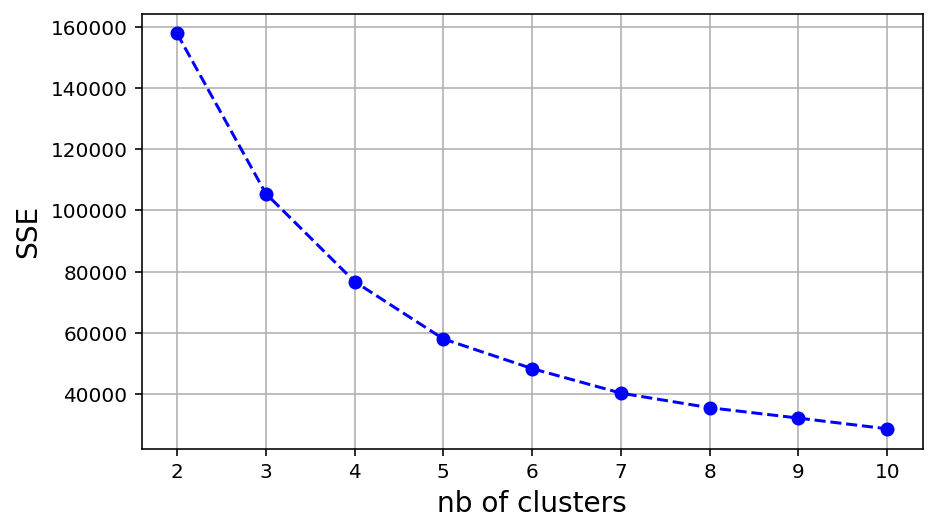

In [15]:
fig = plt.figure(figsize=(7, 4))
plt.plot(k_list,sse_list,'bo--')
plt.grid()
plt.xlabel("nb of clusters",fontsize=14)
plt.ylabel("SSE",fontsize=14)

## K-Means

In [16]:
km = KMeans(n_clusters = 3) # create a KMeans object
km.fit(dt) # compute the clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

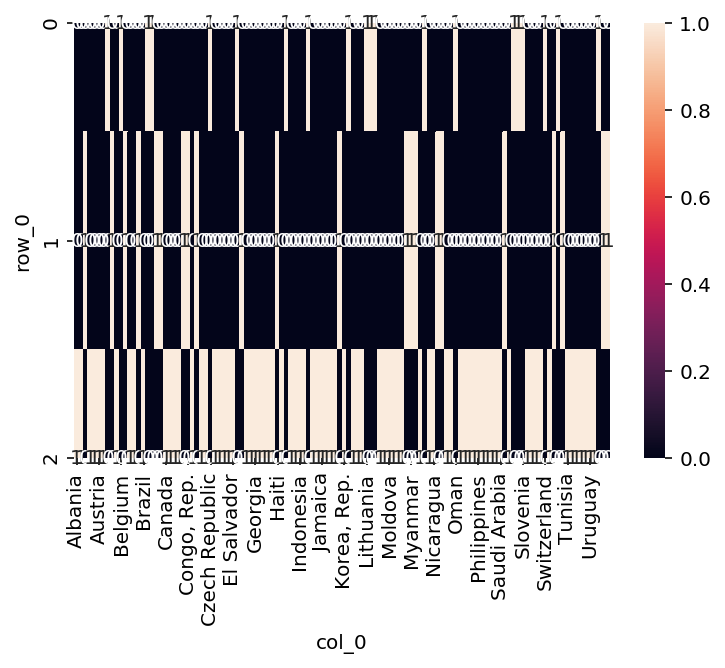

In [17]:
km.cluster_centers_
clusters = km.labels_ # get cluster labels for all objects
crosstab = pds.crosstab(clusters, dt.index)
sns.heatmap(crosstab, annot=True)

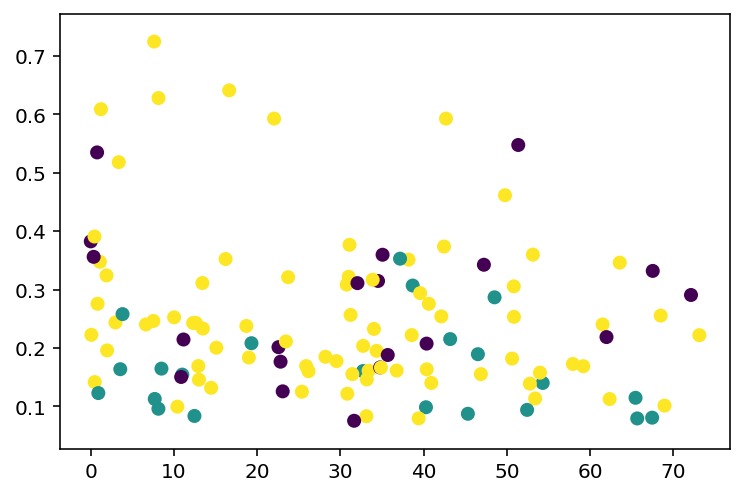

In [18]:
plt.scatter(dt.iloc[:,5], dt.iloc[:,0], c = clusters)

In [19]:
# sns.pairplot(data=dt, hue="clusters")

c1  = []
c2  = []
c3  = []
#c4  = []
dt.index[1]
lab = km.labels_
for i in range(len(lab)) :
    if lab[i] == 0 :
        c1.append(dt.index[i])
    elif lab[i] == 1 :
        c2.append(dt.index[i])
    else :
        c3.append(dt.index[i])
print(c1)
print(c2)
print(c3)
#print(c4)

['Bahrain', 'Belgium', 'Brunei Darussalam', 'Bulgaria', 'Czech Republic', 'Estonia', 'Hungary', 'Ireland', 'Kuwait', 'Lithuania', 'Luxembourg', 'Malaysia', 'Netherlands', 'Oman', 'Singapore', 'Slovak Republic', 'Slovenia', 'Switzerland', 'Thailand', 'Vietnam']
['Angola', 'Bangladesh', 'Benin', 'Botswana', 'Cambodia', 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Ethiopia', 'Haiti', 'Kenya', 'Mozambique', 'Myanmar', 'Namibia', 'Niger', 'Nigeria', 'Senegal', 'Tanzania', 'Togo', 'Zambia', 'Zimbabwe']
['Albania', 'Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Honduras', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', '

In [20]:
dt.index[1]

'Algeria'

In [21]:
km.labels_[1]

2